# Latency and Tick - 1D

## Python Imports

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy.optimize import minimize

In [3]:
from functools import partial

In [4]:
from numba import jit
from numba import njit
from numba import types
from numba.typed import Dict
# from numba.typed import List

## Tick Imports

In [5]:
# %matplotlib inline

In [6]:
from tick.hawkes import SimuHawkes, SimuHawkesMulti
from tick.base import TimeFunction
from tick.hawkes import HawkesKernelTimeFunc, HawkesKernelExp
# from tick.hawkes import HawkesKernel0
# from tick.hawkes import HawkesKernelSumExp
# from tick.hawkes import HawkesEM, HawkesSumExpKern
# from tick.hawkes import SimuPoissonProcess, SimuInhomogeneousPoisson
# from tick.hawkes import HawkesBasisKernels, HawkesSumGaussians
from tick.plot import plot_timefunction
# from tick.plot import plot_point_process
# from tick.plot import plot_hawkes_kernels
# from tick.plot import plot_basis_kernels

In [7]:
import hawklat as hl

## Definitions

In [51]:
n_paths = 1000

In [9]:
end_time_1 = 100
end_time_2 = 1000
end_time_3 = 10000

## Simple example of exponential Kernel

In [10]:
α1 = 0.6
β1 = 0.8
λ01 = 1.2

In [11]:
def ek1(t):
    return α1 * np.exp(-β1 * t)

In [12]:
def ev_size(λ0, α, β, t):
    return (λ0 * t) / (1 - (α / β))

In [13]:
sup1 = 10

In [14]:
ekc1 = hl.time_funclat(ek1, sup1, 0)

In [15]:
ektf1 = HawkesKernelTimeFunc(ekc1)

In [16]:
ekprm1 = HawkesKernelExp(α1 / β1, β1)

/Users/marcoscscarreira/opt/miniconda3/envs/mcsc/lib/python3.8/site-packages/tick/plot/plot_timefunction.py:113: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


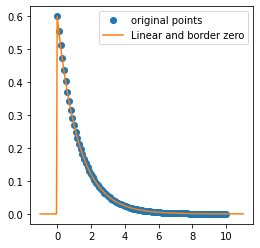

In [17]:
plot_timefunction(ekc1)

In [32]:
hawkestf1 = SimuHawkes(baseline=[λ01], kernels=[[ektf1]], end_time=end_time_1, verbose=False, seed=13)
hawkestf2 = SimuHawkes(baseline=[λ01], kernels=[[ektf1]], end_time=end_time_2, verbose=False, seed=13)
hawkestf3 = SimuHawkes(baseline=[λ01], kernels=[[ektf1]], end_time=end_time_3, verbose=False, seed=13)

In [52]:
multitf1 = SimuHawkesMulti(hawkestf1, n_simulations=n_paths)
multitf2 = SimuHawkesMulti(hawkestf2, n_simulations=n_paths)
multitf3 = SimuHawkesMulti(hawkestf3, n_simulations=n_paths)

In [53]:
multitf1.simulate()
multitf2.simulate()
multitf3.simulate()

In [54]:
multitf1_sizes = pd.Series([len(mt[0]) for mt in multitf1.timestamps])
multitf2_sizes = pd.Series([len(mt[0]) for mt in multitf2.timestamps])
multitf3_sizes = pd.Series([len(mt[0]) for mt in multitf3.timestamps])

In [36]:
hawkesprm1 = SimuHawkes(baseline=[λ01], kernels=[[ekprm1]], end_time=end_time_1, verbose=False, seed=13)
hawkesprm2 = SimuHawkes(baseline=[λ01], kernels=[[ekprm1]], end_time=end_time_2, verbose=False, seed=13)
hawkesprm3 = SimuHawkes(baseline=[λ01], kernels=[[ekprm1]], end_time=end_time_3, verbose=False, seed=13)

In [55]:
multiprm1 = SimuHawkesMulti(hawkesprm1, n_simulations=n_paths)
multiprm2 = SimuHawkesMulti(hawkesprm2, n_simulations=n_paths)
multiprm3 = SimuHawkesMulti(hawkesprm3, n_simulations=n_paths)

In [56]:
multiprm1.simulate()
multiprm2.simulate()
multiprm3.simulate()

In [57]:
multiprm1_sizes = pd.Series([len(mt[0]) for mt in multiprm1.timestamps])
multiprm2_sizes = pd.Series([len(mt[0]) for mt in multiprm2.timestamps])
multiprm3_sizes = pd.Series([len(mt[0]) for mt in multiprm3.timestamps])

In [40]:
[ev_size(λ01, α1, β1, end_time_1), ev_size(λ01, α1, β1, end_time_2), ev_size(λ01, α1, β1, end_time_3)]

[479.9999999999998, 4799.999999999998, 47999.99999999998]

In [58]:
multitf1_sizes.describe()

count    1000.000000
mean      460.667000
std        86.701761
min       238.000000
25%       399.000000
50%       454.000000
75%       519.000000
max       973.000000
dtype: float64

In [59]:
multiprm1_sizes.describe()

count    1000.000000
mean      460.385000
std        86.597482
min       238.000000
25%       398.750000
50%       454.000000
75%       519.000000
max       973.000000
dtype: float64

In [60]:
multitf2_sizes.describe()

count    1000.000000
mean     4790.098000
std       276.805599
min      3938.000000
25%      4607.750000
50%      4782.500000
75%      4976.250000
max      5780.000000
dtype: float64

In [61]:
multiprm2_sizes.describe()

count    1000.000000
mean     4787.267000
std       276.410562
min      3938.000000
25%      4606.750000
50%      4780.000000
75%      4974.250000
max      5776.000000
dtype: float64

In [62]:
multitf3_sizes.describe()

count     1000.000000
mean     48010.144000
std        885.026341
min      45222.000000
25%      47395.500000
50%      48015.500000
75%      48595.750000
max      50570.000000
dtype: float64

In [63]:
multiprm3_sizes.describe()

count     1000.000000
mean     47981.100000
std        884.444302
min      45169.000000
25%      47368.750000
50%      47988.000000
75%      48565.000000
max      50539.000000
dtype: float64

In [ ]:
def_bounds = [(0.01, 2.0), (0.01, 100.), (0.01, 200.)]

In [ ]:
def_constraint = {'type': 'ineq', 'fun': lambda x:  x[2] - x[1]}

In [ ]:
def_x0 = np.array([1., 0.3, 0.5])

In [ ]:
%%time

np.mean(hl.findθ(multiprm1.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0), axis=0)

In [ ]:
%%time

np.mean(hl.findθlat(multiprm1.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=0), axis=0)

In [ ]:
%%time

np.mean(hl.findθ(multitf1.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0), axis=0)

In [ ]:
%%time

np.mean(hl.findθlat(multitf1.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=0), axis=0)

In [ ]:
%%time

np.mean(hl.findθ(multiprm2.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0), axis=0)

In [ ]:
%%time

np.mean(hl.findθlat(multiprm2.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=0), axis=0)

In [ ]:
%%time

np.mean(hl.findθ(multitf2.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0), axis=0)

In [ ]:
%%time

np.mean(hl.findθlat(multitf2.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=0), axis=0)

In [ ]:
%%time

np.mean(hl.findθ(multiprm3.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0), axis=0)

In [ ]:
%%time

np.mean(hl.findθlat(multiprm3.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=0), axis=0)

In [ ]:
%%time

np.mean(hl.findθ(multitf3.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0), axis=0)

In [ ]:
%%time

np.mean(hl.findθlat(multitf3.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=0), axis=0)

## Simple example of exponential Kernel with latency

### Latency > 0

In [18]:
sup1 = 10
lat1 = 2

In [19]:
ekc3 = hl.time_funclat(ek1, sup1, lat1)

In [20]:
ektf3 = HawkesKernelTimeFunc(ekc3)

/Users/marcoscscarreira/opt/miniconda3/envs/mcsc/lib/python3.8/site-packages/tick/plot/plot_timefunction.py:113: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


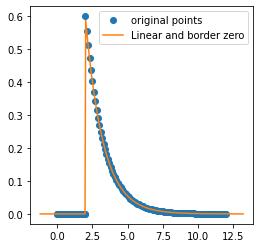

In [21]:
plot_timefunction(ekc3)

In [22]:
hawkestf3_1 = SimuHawkes(baseline=[λ01], kernels=[[ektf3]], end_time=end_time_1, verbose=False, seed=13)
hawkestf3_2 = SimuHawkes(baseline=[λ01], kernels=[[ektf3]], end_time=end_time_2, verbose=False, seed=13)
hawkestf3_3 = SimuHawkes(baseline=[λ01], kernels=[[ektf3]], end_time=end_time_3, verbose=False, seed=13)

In [64]:
multitf3_1 = SimuHawkesMulti(hawkestf3_1, n_simulations=n_paths)
multitf3_2 = SimuHawkesMulti(hawkestf3_2, n_simulations=n_paths)
multitf3_3 = SimuHawkesMulti(hawkestf3_3, n_simulations=n_paths)

In [65]:
multitf3_1.simulate()
multitf3_2.simulate()
multitf3_3.simulate()

In [66]:
multitf3_1_sizes = pd.Series([len(mt[0]) for mt in multitf3_1.timestamps])
multitf3_2_sizes = pd.Series([len(mt[0]) for mt in multitf3_2.timestamps])
multitf3_3_sizes = pd.Series([len(mt[0]) for mt in multitf3_3.timestamps])

In [67]:
multitf3_1_sizes.describe()

count    1000.000000
mean      442.269000
std        78.603468
min       262.000000
25%       388.000000
50%       436.000000
75%       492.000000
max       729.000000
dtype: float64

In [68]:
multitf3_2_sizes.describe()

count    1000.000000
mean     4872.457000
std       275.596694
min      4059.000000
25%      4689.750000
50%      4871.000000
75%      5060.250000
max      5722.000000
dtype: float64

In [69]:
multitf3_3_sizes.describe()

count     1000.000000
mean     49163.576000
std        938.094275
min      46536.000000
25%      48531.250000
50%      49177.500000
75%      49771.250000
max      52156.000000
dtype: float64

In [51]:
%%time

np.mean(hl.findθlat(multitf3_1.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=lat1), axis=0)

CPU times: user 1.75 s, sys: 20 ms, total: 1.77 s
Wall time: 1.76 s


array([1.41312185, 0.59432338, 0.81423172])

In [52]:
%%time

np.mean(hl.findθlat(multitf3_2.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=lat1), axis=0)

CPU times: user 15.5 s, sys: 70.9 ms, total: 15.6 s
Wall time: 15.6 s


array([1.26282245, 0.61530363, 0.80368218])

In [53]:
%%time

np.mean(hl.findθlat(multitf3_3.timestamps,
                 bounds=def_bounds, constraints=def_constraint,
                 x0=def_x0, τ=lat1), axis=0)

CPU times: user 3min 42s, sys: 2.04 s, total: 3min 44s
Wall time: 3min 43s


array([1.2093905 , 0.61256644, 0.78899373])

In [28]:
%%time

a = hl.τtsi(multitf3_1.timestamps[0][0], 2)

CPU times: user 10.5 ms, sys: 2.86 ms, total: 13.3 ms
Wall time: 10.8 ms


In [29]:
%%time

a = hl.τtsi(multitf3_2.timestamps[0][0], 2)

CPU times: user 101 ms, sys: 12.4 ms, total: 114 ms
Wall time: 103 ms


In [30]:
%%time

a = hl.τtsi(multitf3_3.timestamps[0][0], 2)

CPU times: user 1.28 s, sys: 92.8 ms, total: 1.38 s
Wall time: 1.31 s
